In [1]:
# project: p10
# submitter-netid: shizmi
# partner-netid: modonnell7

In [2]:
import pandas as pd
import os, json
import time, requests
from math import radians, cos, sin, asin, sqrt
from bs4 import BeautifulSoup
from pandas import DataFrame, Series

In [3]:
#q1
countries = pd.read_json("https://tyler.caraza-harter.com/cs301/spring19/data/countries.json")
totalArea = countries["area"].sum()
totalArea

127493303

In [4]:
#q2
response = requests.get("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt")
fileList = response.text.split()
fileList[0]

'Brazil_Peru.json'

In [5]:
def get_json(file_name):
    capital_rows = []
    for file_path in fileList:
        if not os.path.exists(file_path):
            r = requests.get("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/" + file_path).json()
            with open(file_path,'w') as f:
                json.dump(r,f)
            capital_rows+=r
        else:
            try:
                file = open(file_path,'r')
                for row in json.load(file):
                    capital_rows.append(row)
                file.close()
            except:
                continue
    return capital_rows

In [6]:
#q3
capital_rows = get_json("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt")
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [7]:
#q4
capitals = DataFrame(capital_rows)
cap = " "
for i in range(len(capitals)):
    if capitals.loc[i,'country'] == "Bermuda":
        cap = capitals.loc[i,'capital']
cap

'Hamilton'

In [8]:
#q5
country = " "
for i in range(len(capitals)):
    if capitals.loc[i,'capital'] == "Maputo":
        country = capitals.loc[i,'country']
country

'Mozambique'

In [9]:
#q6
southernMost = []
southern_capitals = capitals.sort_values(by="latitude").head(5)
southernMost = list(southern_capitals['country'])
southernMost

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [10]:
#q7
northernMost = []
northern_capitals = capitals.sort_values(by="latitude", ascending=False).head(3)
northernMost = list(northern_capitals['country'])
northernMost

['Iceland', 'Finland', 'Norway']

In [11]:
#q8
countries[['birth-rate','death-rate']].describe()

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [12]:
#q9
data = countries[['literacy','phones']]
data = data.stack().str.replace(',','.').unstack()
data.astype('float').describe()

,literacy,phones
count,175.000000,175.000000
mean,82.182286,214.621143
std,20.086897,218.613971
min,17.600000,1.300000
25%,69.950000,31.300000
50%,92.000000,140.100000
75%,98.000000,329.700000
max,100.000000,1035.600000


In [13]:
def getlargest(continent):
    data = countries[['country','continent','coastline','area']]
    cont = data[data['continent'] == continent]
    cont = cont.loc[(cont['coastline'] == 0) & (cont['area'] <= cont['area'].max())]
    largest = cont.sort_values(by='area',ascending=False).head(1)
    return largest.iloc[0]['country']

In [14]:
#q10
getlargest('Europe')

'Belarus'

In [15]:
#q11
getlargest('Africa')

'Chad'

In [16]:
#q12
getlargest("South America")

'Bolivia'

In [17]:
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [18]:
#q13
distance(-89.411893,43.070231,-89.384113,43.074645)

1.433899492072933

In [19]:
def distance_from_countries(country1,country2):
    if country1 == country2:
        return None
    
    firstCountry = capitals[capitals['country'] == country1]
    secondCountry = capitals[capitals['country'] == country2]
    
    return distance(firstCountry.iloc[0]['longitude'],firstCountry.iloc[0]['latitude'],secondCountry.iloc[0]['longitude'],secondCountry.iloc[0]['latitude'])

In [20]:
#q14
distance_from_countries("India","Brazil")

8840.574141306946

In [21]:
#q15
DataFrame({"Chile":{"Chile":None,"Guyana":distance_from_countries("Chile","Guyana"),"Colombia":distance_from_countries("Chile","Colombia")},
           "Guyana":{"Chile":distance_from_countries("Chile","Guyana"),"Guyana":None,"Colombia":distance_from_countries("Colombia","Guyana")},
           "Colombia":{"Chile":distance_from_countries("Chile","Colombia"),"Guyana":distance_from_countries("Colombia","Guyana"),"Colombia":None}})

,Chile,Guyana,Colombia
Chile,NaN,2897.553095,2636.644599
Colombia,2636.644599,1105.066312,NaN
Guyana,2897.553095,NaN,1105.066312


In [22]:
#q16
southAmerica = {}
countriesSA = countries[countries['continent'] == "South America"]
columns = list(countriesSA['country'])
for i in range(len(columns)):
    dictoAdd = {}
    for j in range(len(columns)):
        dictoAdd.update({columns[j]:distance_from_countries(columns[i],columns[j])})
    southAmerica[columns[i]] = dictoAdd
southAmerica = pd.DataFrame.from_dict(southAmerica)
southAmerica

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036442
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.926372,1326.758656,1467.253638,906.799256
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.690680,1459.139733,1967.770515,2344.584922,1412.096335,908.185709
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.054491,NaN,2791.196721,2218.650964
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Paraguay,963.635535,2214.288286,2337.615967,2153.855447,908.185709,906.799256,2544.799572,646.036442,1558.635236,2218.650964,667.699386,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674233,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447


In [23]:
#q17
southAmerica.mean().idxmin()

'Bolivia'

In [24]:
#q18
southAmerica.mean().idxmax()

'Uruguay'

In [25]:
def nearestCountry(country):
    return southAmerica[country].idxmin()

In [26]:
#q19
nearest = {}
for i in range(len(columns)):
    nearest[columns[i]] = {"distance":distance_from_countries(columns[i],nearestCountry(columns[i])),"nearest": nearestCountry(columns[i]) }
nearest = pd.DataFrame.from_dict(nearest)
nearest.transpose()

,distance,nearest
Chile,690.784,Argentina
Guyana,215.336,Suriname
Colombia,451.004,Ecuador
Suriname,215.336,Guyana
Brazil,908.186,Paraguay
Bolivia,669.926,Peru
Venezuela,639.361,Colombia
Argentina,143.07,Uruguay
Peru,669.926,Bolivia
Ecuador,451.004,Colombia


In [27]:
def furthestCountry(country):
    return southAmerica[country].idxmax()

In [28]:
#q20
furthest = {}
for i in range(len(columns)):
    furthest[columns[i]] = {"distance":distance_from_countries(columns[i],furthestCountry(columns[i])),"furthest": furthestCountry(columns[i]) }
furthest = pd.DataFrame.from_dict(furthest)
furthest.transpose()

,distance,furthest
Chile,3043.66,Venezuela
Guyana,2897.55,Chile
Colombia,2962.23,Uruguay
Suriname,2895.81,Chile
Brazil,2344.58,Ecuador
Bolivia,1865.13,Venezuela
Venezuela,3207.35,Uruguay
Argentina,3157.62,Venezuela
Peru,2046.57,Uruguay
Ecuador,2791.2,Uruguay


In [29]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [30]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [31]:
#q21
world = qry("SELECT Continent, COUNT() AS 'number of countries' FROM countries GROUP BY continent ORDER BY count() ASC")
world

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


In [32]:
%matplotlib inline

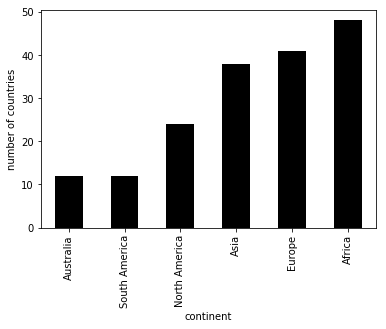

In [33]:
#q22
ax = world.plot.bar(x='continent', color="black")
ax.set_ylabel("number of countries")
ax.legend().remove()

In [34]:
#q23
population = qry("""SELECT Continent, (SUM(population)/1000000.0) AS "total population (million)" FROM countries GROUP BY continent ORDER BY "total population (million)" DESC""")
population

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


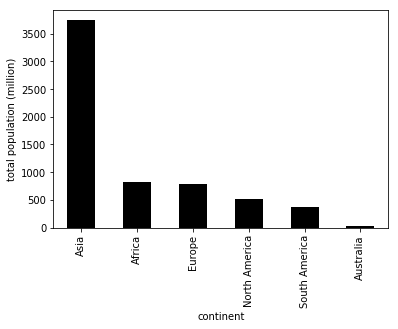

In [35]:
#q24
ax = population.plot.bar(x='continent', color="black")
ax.set_ylabel("total population (million)")
ax.legend().remove()

In [36]:
#q25
qry("SELECT country, SUM(population) AS population FROM countries WHERE continent == 'Australia' GROUP BY country ORDER BY population DESC")

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [37]:
#q26
richest = qry("""SELECT country, (population*"gdp-per-capita")/1000000000.0 AS "real GDP (billion)" FROM countries GROUP BY country ORDER BY "real GDP (billion)" DESC LIMIT 10""")
richest

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


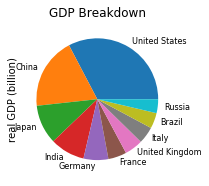

In [38]:
#q27
import matplotlib.pyplot as plt
ax1 = plt.subplot(121, aspect='equal')
plt.title("GDP Breakdown")
richest.plot(kind='pie',y = 'real GDP (billion)', ax=ax1, labels=richest['country'], legend = False, fontsize=8)

In [39]:
#q28
gap = qry("""SELECT country,"birth-rate","death-rate" FROM countries GROUP BY country ORDER BY ("birth-rate" - "death-rate")  DESC""")
gap.head(10)

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


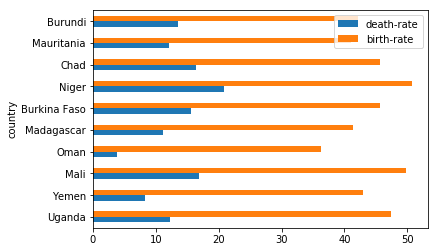

In [40]:
#q29
birthrate = list(gap['birth-rate'].head(10))
deathrate = list(gap['death-rate'].head(10))
df = pd.DataFrame({'death-rate': deathrate, 'birth-rate': birthrate}, index=gap['country'].head(10))
ax = df.plot.barh()

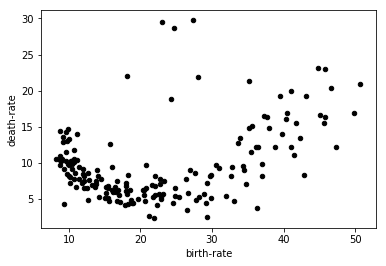

In [41]:
#q30
ax=gap.plot.scatter(x='birth-rate',y='death-rate',color='black')

In [42]:
#q31
qry("""SELECT country,"birth-rate","death-rate" FROM countries WHERE ((`birth-rate` > 15) & (`birth-rate` < 32) & (`death-rate` > 17) & (`death-rate` < 30)) GROUP BY country ORDER BY "birth-rate"  ASC""")

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [43]:
#q32
gap.corr().iloc[0]['death-rate']

0.40037782919521714

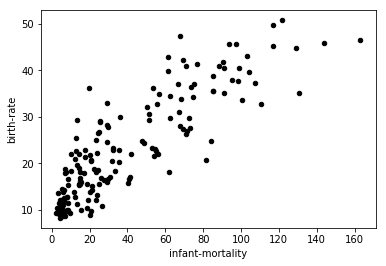

In [44]:
#q33
infantBirth = qry("""SELECT country,"birth-rate","infant-mortality" FROM countries GROUP BY country ORDER BY ("birth-rate" - "infant-mortality")  DESC""")
ax=infantBirth.plot.scatter(x='infant-mortality',y='birth-rate',color='black')

In [45]:
#q34
infantBirth.corr().iloc[0]['infant-mortality']
# Observation
# as infant mortality increases, birthrate inccreases. The more people are born, the more chance there is for infants do die
# Birthrate and deathrate are not as heavily correlated because many other factors should 
# be taken into account such as technology or medicinal availability. 

0.868726567803142

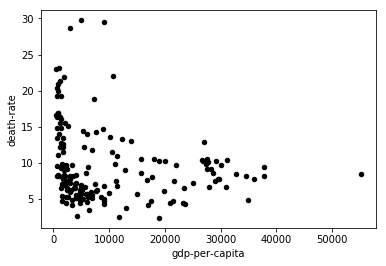

In [46]:
#q35
gdpdeath = qry("""SELECT country,"gdp-per-capita","death-rate" FROM countries GROUP BY country ORDER BY "gdp-per-capita"  DESC""")
ax=gdpdeath.plot.scatter(x='gdp-per-capita',y='death-rate',color='black')

In [47]:
#q36
gdpdeath.corr().iloc[0]['death-rate']
# Observation:
# there is a negative correlation becase gdp-per-capita and deathrate do not depend on each other
# they are unrelated

-0.20995846867456758

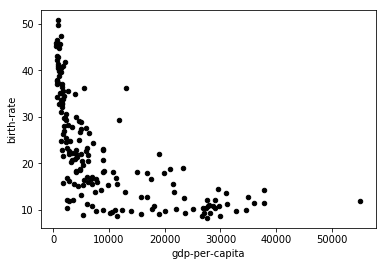

In [48]:
#q37
gdpbirth = qry("""SELECT country,"gdp-per-capita","birth-rate" FROM countries GROUP BY country ORDER BY "gdp-per-capita"  DESC""")
ax=gdpbirth.plot.scatter(x='gdp-per-capita',y='birth-rate',color='black')

# Observation:
# gdp-per-capita and birthrate are negatively correlated,so they dont affect one another

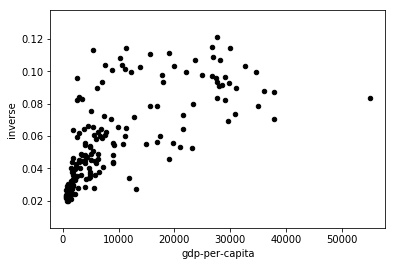

In [49]:
#q38
gdpbirthInverse = qry("""SELECT country,"gdp-per-capita", (1/"birth-rate") AS inverse FROM countries GROUP BY country ORDER BY "gdp-per-capita"  DESC""")
ax=gdpbirthInverse.plot.scatter(x='gdp-per-capita',y='inverse',color='black')

In [50]:
#q39
import numpy as np

df = gdpbirthInverse
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
slope = coefficients[0] # slope
intercept = coefficients[1] # intercept
regression = (slope,intercept)
regression

(1.8422394400496372e-06, 0.039035043649535375)

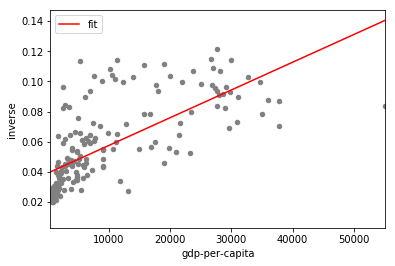

In [51]:
#q40
ax = df.plot.scatter(x='gdp-per-capita', y='inverse', color='gray')
df["fit"] = df["gdp-per-capita"] * slope + intercept
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [52]:
conn.close()